In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
df=pd.read_csv(url)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# features we will use for prediction
col=['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']

In [5]:
col

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

In [6]:
df=df[col]

In [7]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


## Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [9]:
features_na=[features for features in df.columns if df[features].isnull().sum()>0]

In [10]:
features_na

['Age']

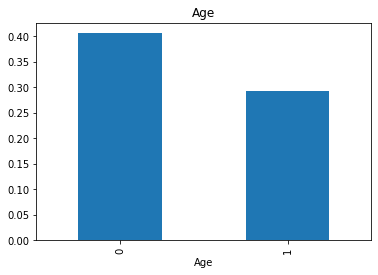

In [11]:
for features in features_na:
    data=df.copy()
    data[features]=np.where(df[features].isnull(),1,0)
    data.groupby(features)['Survived'].mean().plot.bar()
    plt.title(features)
    plt.show()

In [12]:
numerical_features=[features for features in df.columns if df[features].dtypes!='O']

In [13]:
numerical_features

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

In [14]:
for features in numerical_features:
    print("The column {} have {} unique features".format(features,len(df[features].unique())))

The column Pclass have 3 unique features
The column Age have 89 unique features
The column SibSp have 7 unique features
The column Parch have 7 unique features
The column Fare have 248 unique features
The column Survived have 2 unique features


We can clearly see that Pclass is a categorical feature

In [15]:
df = pd.get_dummies(df, columns=["Pclass"], prefix=["Pc"],drop_first=False)

In [16]:
df

,Sex,Age,SibSp,Parch,Fare,Survived,Pc_1,Pc_2,Pc_3
0,male,22.0,1,0,7.2500,0,0,0,1
1,female,38.0,1,0,71.2833,1,1,0,0
2,female,26.0,0,0,7.9250,1,0,0,1
3,female,35.0,1,0,53.1000,1,1,0,0
4,male,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,0,0,1,0
887,female,19.0,0,0,30.0000,1,1,0,0
888,female,NaN,1,2,23.4500,0,0,0,1
889,male,26.0,0,0,30.0000,1,1,0,0


Now we will deal with the Sex column

In [17]:
df = pd.get_dummies(df, columns=["Sex"], prefix=["Sex"],drop_first=False)

In [18]:
df

,Age,SibSp,Parch,Fare,Survived,Pc_1,Pc_2,Pc_3,Sex_female,Sex_male
0,22.0,1,0,7.2500,0,0,0,1,0,1
1,38.0,1,0,71.2833,1,1,0,0,1,0
2,26.0,0,0,7.9250,1,0,0,1,1,0
3,35.0,1,0,53.1000,1,1,0,0,1,0
4,35.0,0,0,8.0500,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0,0,1,0,0,1
887,19.0,0,0,30.0000,1,1,0,0,1,0
888,NaN,1,2,23.4500,0,0,0,1,1,0
889,26.0,0,0,30.0000,1,1,0,0,0,1


In [19]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1]

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

Age: 0.1987% missing values


In [20]:
for feature in features_nan:
    median_value=df[feature].median()
    df[feature].fillna(median_value,inplace=True)
median_value

28.0

replaced the nan value in Age with its median value 28

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Survived    891 non-null    int64  
 5   Pc_1        891 non-null    uint8  
 6   Pc_2        891 non-null    uint8  
 7   Pc_3        891 non-null    uint8  
 8   Sex_female  891 non-null    uint8  
 9   Sex_male    891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

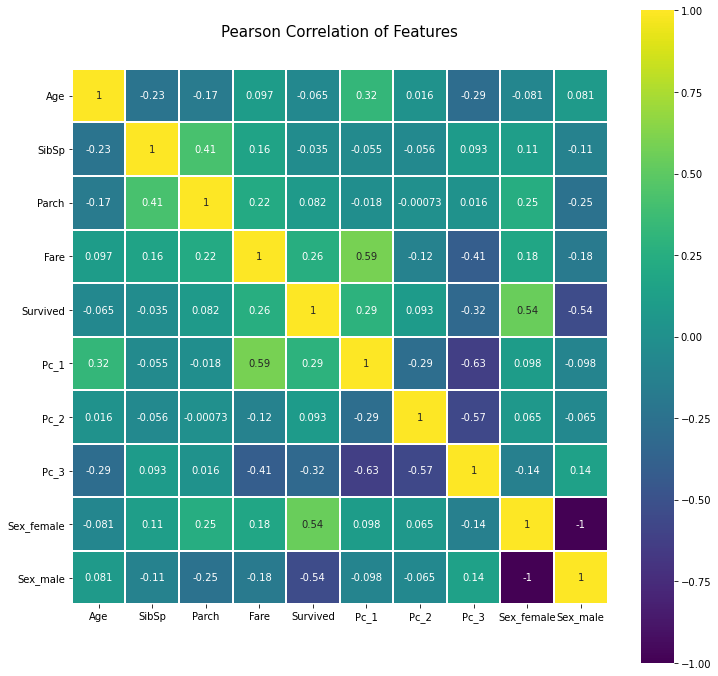

In [22]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [23]:
df

,Age,SibSp,Parch,Fare,Survived,Pc_1,Pc_2,Pc_3,Sex_female,Sex_male
0,22.0,1,0,7.2500,0,0,0,1,0,1
1,38.0,1,0,71.2833,1,1,0,0,1,0
2,26.0,0,0,7.9250,1,0,0,1,1,0
3,35.0,1,0,53.1000,1,1,0,0,1,0
4,35.0,0,0,8.0500,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0,0,1,0,0,1
887,19.0,0,0,30.0000,1,1,0,0,1,0
888,28.0,1,2,23.4500,0,0,0,1,1,0
889,26.0,0,0,30.0000,1,1,0,0,0,1


## Train Test split

In [24]:
from sklearn.model_selection import train_test_split
X=df.drop(['Survived'],axis=1)
y=df['Survived']

y=np.ravel(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 9)
(712,)
(179, 9)
(179,)


## Model training

In [25]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='gini')
model

DecisionTreeClassifier()

In [26]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5223293439716312, 0.9736842105263158, 'X[7] <= 0.5\ngini = 0.47\nsamples = 712\nvalue = [443, 269]'),
 Text(0.22074468085106383, 0.9210526315789473, 'X[0] <= 13.0\ngini = 0.3\nsamples = 463\nvalue = [378, 85]'),
 Text(0.03546099290780142, 0.868421052631579, 'X[1] <= 2.5\ngini = 0.458\nsamples = 31\nvalue = [11, 20]'),
 Text(0.02127659574468085, 0.8157894736842105, 'X[2] <= 0.5\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.014184397163120567, 0.7631578947368421, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0070921985815602835, 0.7105263157894737, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.02127659574468085, 0.7105263157894737, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.028368794326241134, 0.7631578947368421, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.04964539007092199, 0.8157894736842105, 'X[0] <= 3.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.0425531914893617, 0.7631578947368421, 'X[2] <= 1.5\ngini = 0.375\

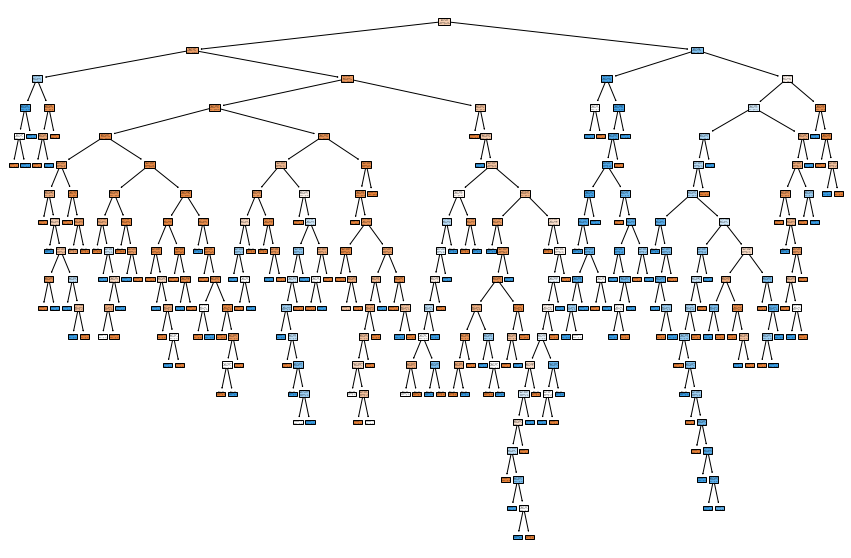

In [27]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

## Model Evaluation

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score,classification_report
confusion_matrix(y_test,model.predict(X_test))

array([[89, 17],
       [27, 46]], dtype=int64)

roc_auc_score:  0.7348798139054018


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


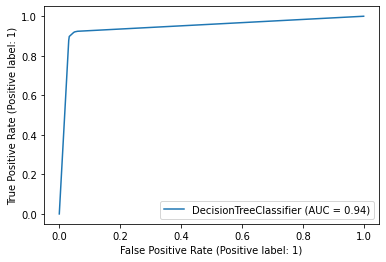

In [29]:
from sklearn.metrics import roc_curve,plot_roc_curve
print('roc_auc_score: ', roc_auc_score(y_test, model.predict(X_test)))
roc_curve(y_test, model.predict(X_test))
plot_roc_curve(model,X,y)

In [30]:
print("train set accuracy score :",accuracy_score(y_train,model.predict(X_train)))
print("test set accuracy score :",  accuracy_score(y_test,model.predict(X_test)))

train set accuracy score : 0.9873595505617978
test set accuracy score : 0.7541899441340782


In [31]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

## Grid Search

In [32]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()

In [33]:
parameter ={
 "criterion" : ["gini","entropy"],
 "max_depth" : [1,2,3,4,5,6,7,None],
 "max_features": ['sqrt', 'log2', None]
}

In [34]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, parameter,scoring='accuracy', cv=10)

In [35]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='accuracy')

In [36]:
grid.best_score_

0.834370109546166

In [37]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2'}

In [38]:
print('Accuracy score for train data is:', accuracy_score(y_train,grid.predict(X_train)))
print('Accuracy score for test data is:', accuracy_score(y_test,grid.predict(X_test)))

Accuracy score for train data is: 0.8469101123595506
Accuracy score for test data is: 0.8156424581005587


In [39]:
df

,Age,SibSp,Parch,Fare,Survived,Pc_1,Pc_2,Pc_3,Sex_female,Sex_male
0,22.0,1,0,7.2500,0,0,0,1,0,1
1,38.0,1,0,71.2833,1,1,0,0,1,0
2,26.0,0,0,7.9250,1,0,0,1,1,0
3,35.0,1,0,53.1000,1,1,0,0,1,0
4,35.0,0,0,8.0500,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0,0,1,0,0,1
887,19.0,0,0,30.0000,1,1,0,0,1,0
888,28.0,1,2,23.4500,0,0,0,1,1,0
889,26.0,0,0,30.0000,1,1,0,0,0,1
